# Exam Project Anissa, Anna, Lilo

In [1]:
## This is our project that uses a machine learning model to classify audio tracks into genres
## After exploring and visualizing the data and clarifying why machine learning is the best approach to classify songs accurately in our presentation 
## we will now show you the machine learning model to help the music company (Harmonic Beats)

In [2]:
# import the necessary libaries
import pandas as pd
import numpy as np 

In [3]:
# load the data set
songs_data = pd.read_csv("../data/songs_data.csv")

## Data Overview and summary of EDA

In [4]:
# Here we generate an overview to get familiar with the data
# summary of Exploratory Data Analysis as conducted in Milestone 1 of exam project 

In [5]:
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          32833 non-null  object 
 1   track_name        32828 non-null  object 
 2   track_artist      32828 non-null  object 
 3   track_popularity  32833 non-null  int64  
 4   playlist_name     32833 non-null  object 
 5   playlist_id       32833 non-null  object 
 6   genre             32833 non-null  object 
 7   danceability      32833 non-null  float64
 8   energy            32833 non-null  float64
 9   key               32833 non-null  int64  
 10  loudness          32833 non-null  float64
 11  mode              32833 non-null  int64  
 12  speechiness       32833 non-null  float64
 13  acousticness      32833 non-null  float64
 14  instrumentalness  32833 non-null  float64
 15  liveness          32833 non-null  float64
 16  valence           32833 non-null  float6

In [6]:
songs_data.shape

(32833, 19)

In [7]:
songs_data.genre.value_counts()

genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

### Breakdown into Gernres

In [8]:
# delete?

In [9]:
rock_data = songs_data[songs_data.genre == "rock"]

In [10]:
pop_data = songs_data[songs_data.genre == "pop"]

In [11]:
rap_data = songs_data[songs_data.genre == "rap"]

In [12]:
latin_data = songs_data[songs_data.genre == "latin"]

In [13]:
rnb_data = songs_data[songs_data.genre == "r&b"]

In [14]:
edm_data = songs_data[songs_data.genre == "edm"]

## 1. Data Cleaning

In [15]:
# in order of developing an efficient model we will analyze the data to remove any redundant data and handle any missing values

### check for any missing data

In [16]:
# As part of the data cleaning we will check for any missing values in our dataset

In [17]:
songs_data.isnull().sum()

track_id            0
track_name          5
track_artist        5
track_popularity    0
playlist_name       0
playlist_id         0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [18]:
# we realize there are five values missing in columns "track_name" and "track_artisit"
# since these values fall under categories that we define as non-essential for genre classification (see below) there is no need to drop them


### check for duplicates

In [19]:
songs_data.duplicated().sum()

323

In [20]:
# dropping duplicates

In [21]:
print(songs_data.shape)
songs_data_reduced = songs_data.drop_duplicates()
print(songs_data_reduced.shape)


(32833, 19)
(32510, 19)


### identifying irrelevant features

In [22]:
# following columns we define as non-essential to genre classification
# they do not have meaningful correlation with genre 
# 

In [23]:
# Regarding the duration we thought that it could be quite useful for genre classification 
# because certain genres tend to have typical song lengths (e.g. rock songs typically longer than pop songs)
# we visualized each genre's duration to decide if it has meaningful correlation with genre


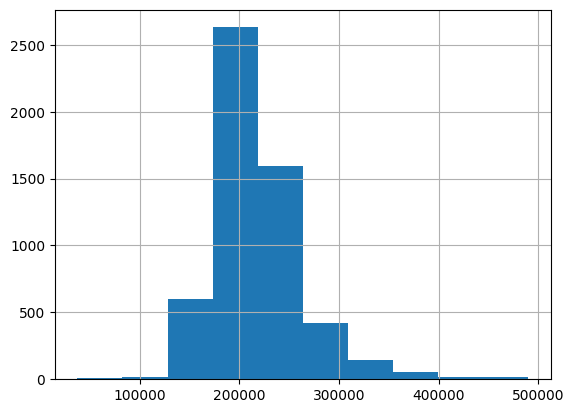

In [24]:
pop_data.duration_ms.hist();

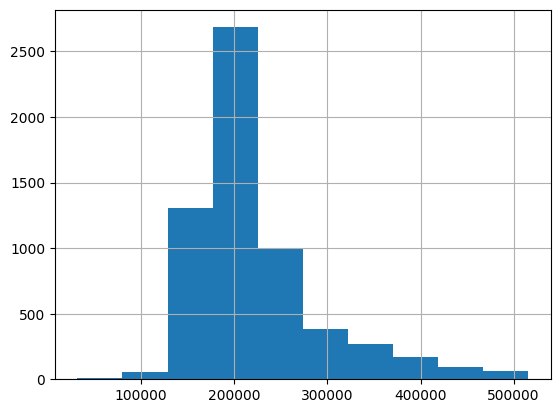

In [25]:
edm_data.duration_ms.hist();

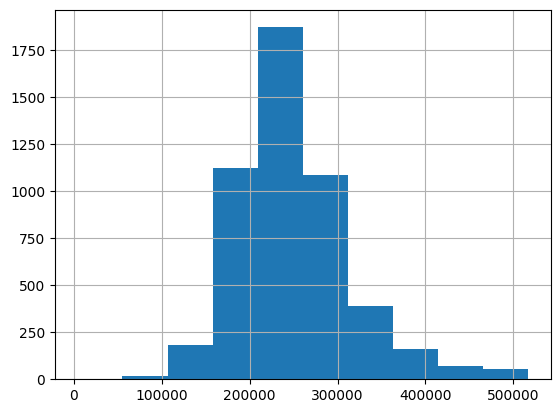

In [26]:
rock_data.duration_ms.hist();

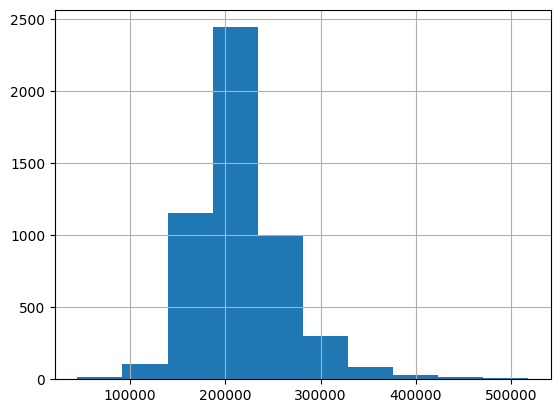

In [27]:
latin_data.duration_ms.hist();

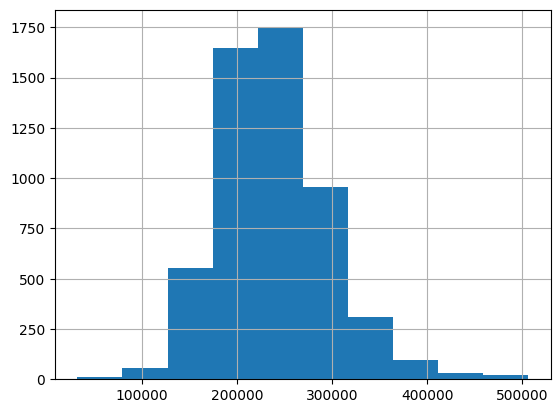

In [28]:
rnb_data.duration_ms.hist();

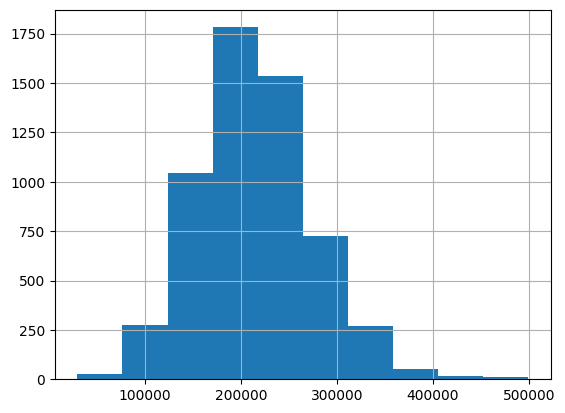

In [29]:
rap_data.duration_ms.hist();

In [30]:
# decided that the differences between the genres were not big enough to determine anything and decided to drop the column as well

In [31]:
songs_data_cleaned = songs_data.drop(columns=['track_name', 'track_id','track_popularity', 'track_artist', 'playlist_name', 'playlist_id', 'duration_ms'])

In [32]:
songs_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             32833 non-null  object 
 1   danceability      32833 non-null  float64
 2   energy            32833 non-null  float64
 3   key               32833 non-null  int64  
 4   loudness          32833 non-null  float64
 5   mode              32833 non-null  int64  
 6   speechiness       32833 non-null  float64
 7   acousticness      32833 non-null  float64
 8   instrumentalness  32833 non-null  float64
 9   liveness          32833 non-null  float64
 10  valence           32833 non-null  float64
 11  tempo             32833 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 3.0+ MB


In [33]:
print(songs_data_cleaned.shape)

(32833, 12)


## remove outliers

In [34]:
# check every characteristc for outliers and remove them

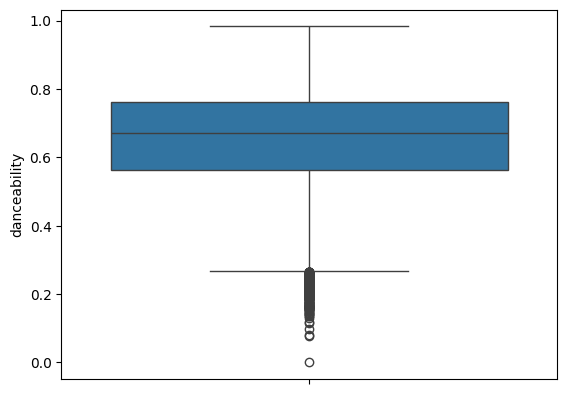

In [35]:
import seaborn as sns
#distribution of danceability
sns.boxplot(y=songs_data_cleaned.danceability);

In [36]:
# remove outliers
# reference: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['danceability'] > 0.28]

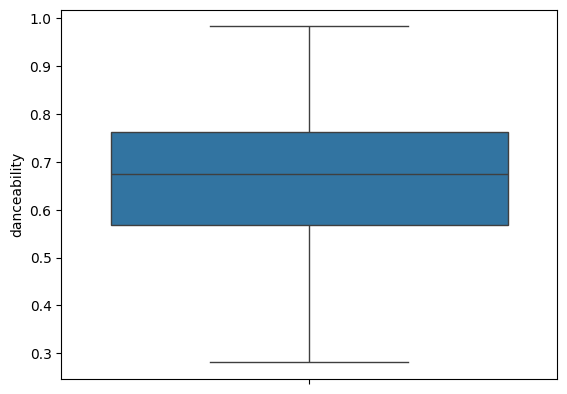

In [37]:
sns.boxplot(y=songs_data_cleaned.danceability);

In [38]:
print(songs_data_cleaned.shape)

(32436, 12)


In [39]:
songs_data_cleaned.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972
2,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008
3,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956
4,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976


In [40]:
songs_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32436 entries, 0 to 32832
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             32436 non-null  object 
 1   danceability      32436 non-null  float64
 2   energy            32436 non-null  float64
 3   key               32436 non-null  int64  
 4   loudness          32436 non-null  float64
 5   mode              32436 non-null  int64  
 6   speechiness       32436 non-null  float64
 7   acousticness      32436 non-null  float64
 8   instrumentalness  32436 non-null  float64
 9   liveness          32436 non-null  float64
 10  valence           32436 non-null  float64
 11  tempo             32436 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 3.2+ MB


In [39]:
#repeat for the other categories

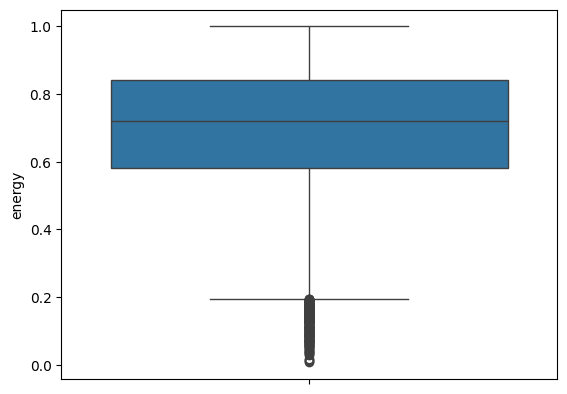

In [40]:
sns.boxplot(y=songs_data_cleaned.energy);

In [41]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['energy'] > 0.21]

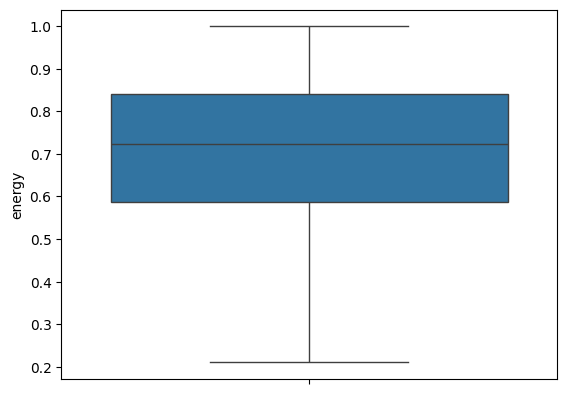

In [42]:
sns.boxplot(y=songs_data_cleaned.energy);

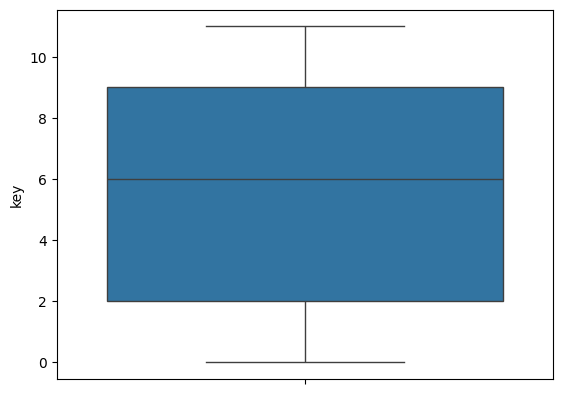

In [43]:
sns.boxplot(y=songs_data_cleaned.key);
#no outliers so no need to remove them

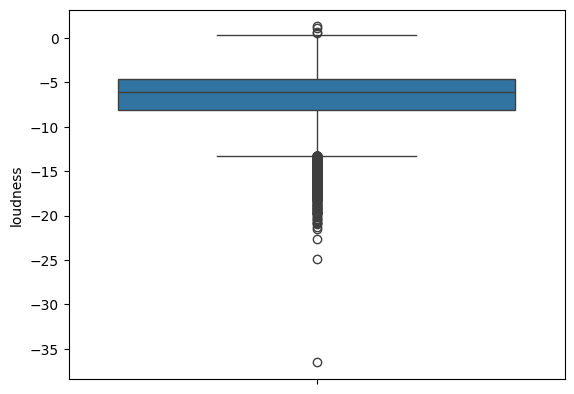

In [44]:
sns.boxplot(y=songs_data_cleaned.loudness);

In [45]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['loudness'] > -12.5]
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['loudness'] < 0]

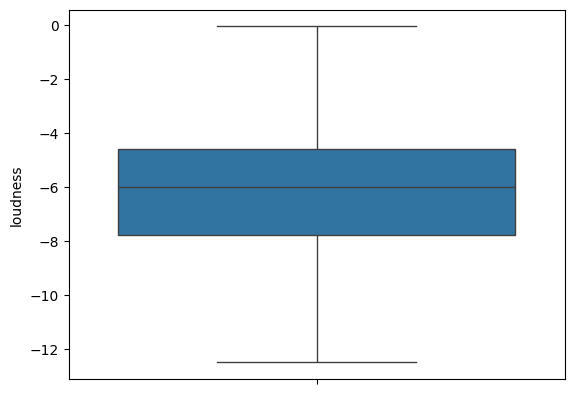

In [46]:
sns.boxplot(y=songs_data_cleaned.loudness);

In [47]:
#sns.boxplot(y=songs_data_cleaned.mode);

In [48]:
#songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['mode'] > 0.24]

In [49]:
#sns.boxplot(y=songs_data_cleaned.mode);

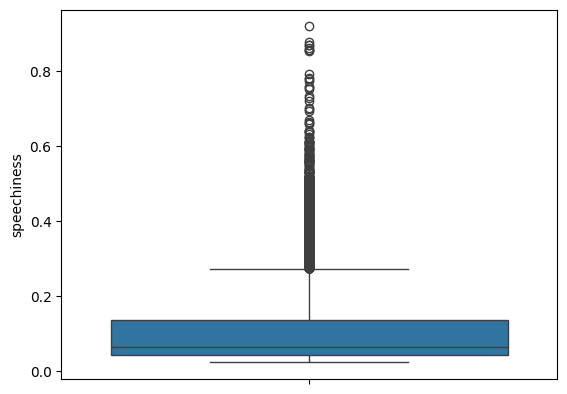

In [50]:
sns.boxplot(y=songs_data_cleaned.speechiness);

In [51]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['speechiness'] < 0.107]

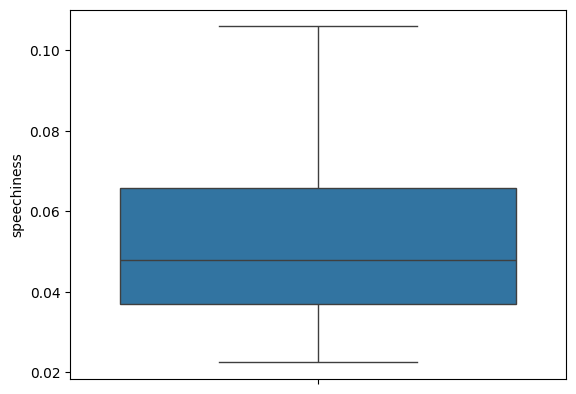

In [52]:
sns.boxplot(y=songs_data_cleaned.speechiness);

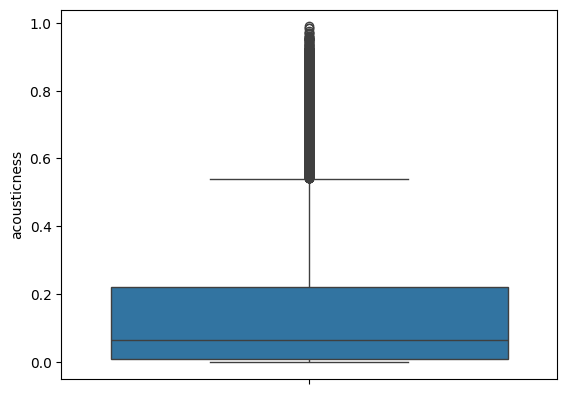

In [53]:
sns.boxplot(y=songs_data_cleaned.acousticness);

In [54]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['acousticness'] < 0.190]

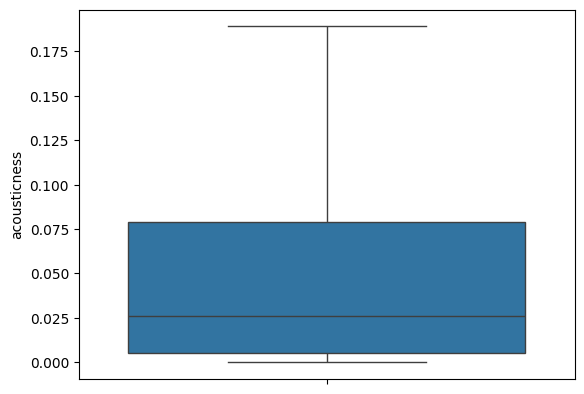

In [55]:
sns.boxplot(y=songs_data_cleaned.acousticness);

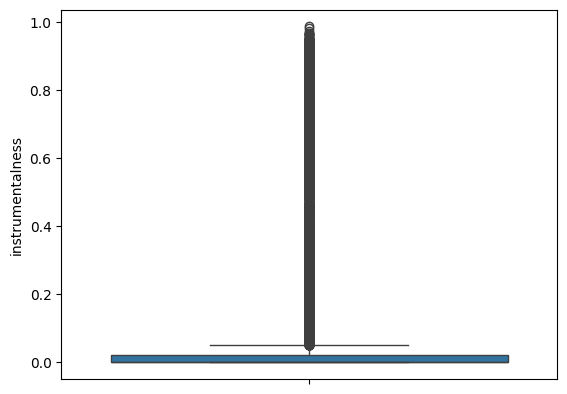

In [56]:
sns.boxplot(y=songs_data_cleaned.instrumentalness);

In [66]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['instrumentalness'] > 0.2]

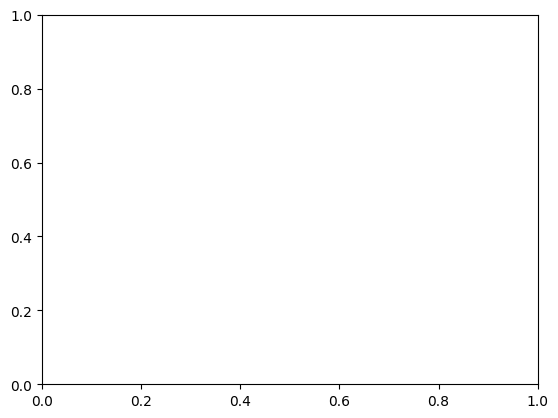

In [67]:
sns.boxplot(y=songs_data_cleaned.instrumentalness);

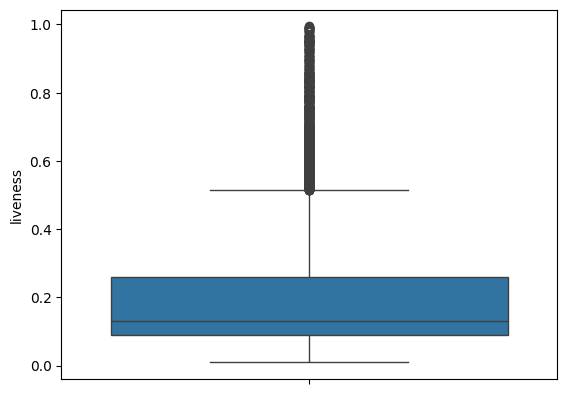

In [59]:
sns.boxplot(y=songs_data_cleaned.liveness);

In [60]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['liveness'] > 0.5]

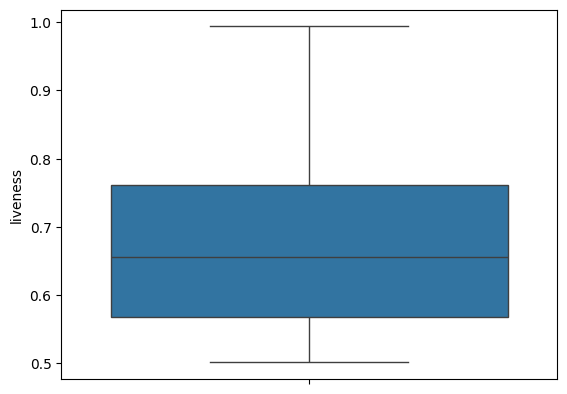

In [61]:
sns.boxplot(y=songs_data_cleaned.liveness);

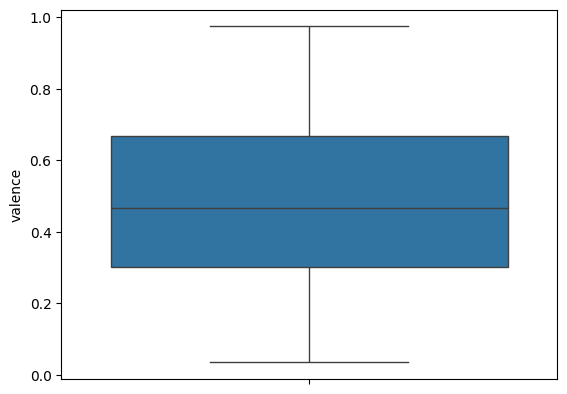

In [62]:
sns.boxplot(y=songs_data_cleaned.valence);

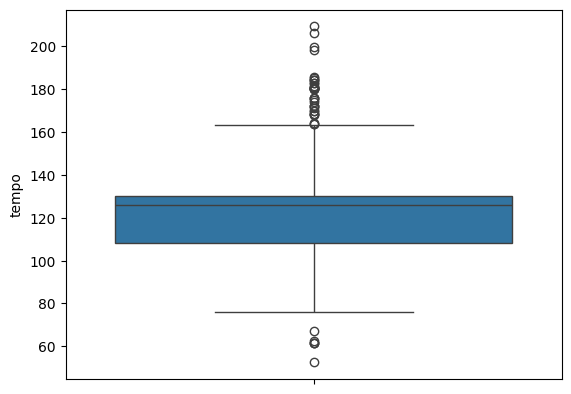

In [63]:
sns.boxplot(y=songs_data_cleaned.tempo);

In [64]:
songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['tempo'] > 170]
#songs_data_cleaned = songs_data_cleaned[songs_data_cleaned['tempo'] < 70]

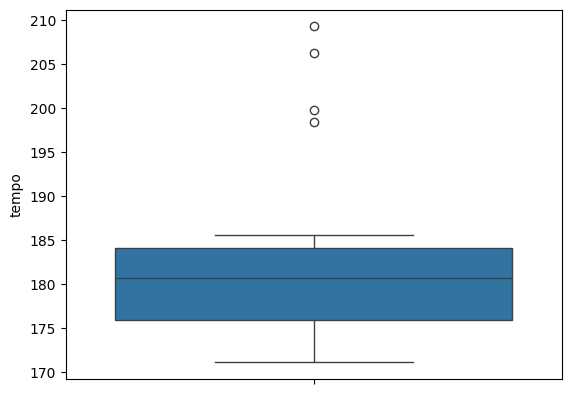

In [65]:
sns.boxplot(y=songs_data_cleaned.tempo);

In [69]:
print(songs_data_cleaned.shape)

(0, 12)


In [70]:
songs_data_cleaned.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo


# 2. Feature Engineering

## Label Encoding

In [42]:
# first thing we do in feature engineering is that we need to transform the object types into numbers by using label encoding

In [43]:
songs_data_cleaned['genre'].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [44]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
genre_encoded = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
songs_data_cleaned['genre']= genre_encoded.fit_transform(songs_data_cleaned['genre']) 
  
songs_data_cleaned['genre'].unique() 

array([2, 4, 5, 1, 3, 0])

In [45]:
songs_data_cleaned.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,2,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972
2,2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008
3,2,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956
4,2,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976


In [46]:
# the next step is to encode the track id into numerical type data

In [47]:
songs_data_cleaned.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,2,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972
2,2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008
3,2,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956
4,2,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976


## Creating New Features to improve accuracy 

In [48]:
songs_data_cleaned['danceability_energy'] = songs_data_cleaned['danceability'] / songs_data_cleaned['energy']

In [49]:
#songs_data_cleaned['acoustic_instrumental'] = songs_data_cleaned['acousticness'] * songs_data_cleaned['instrumentalness']

In [50]:
songs_data_cleaned['valence_loudness'] = songs_data_cleaned['valence'] / songs_data_cleaned['loudness']

In [51]:
songs_data_cleaned.tempo.max()

239.44

In [52]:
songs_data_cleaned['tempo_band'] = pd.cut( songs_data_cleaned['tempo'], bins=[0, 60, 120, 180, 240], labels=[1, 2, 3, 4])

In [53]:
songs_data_cleaned['tempo_band'].unique()

[3, 2, 4, 1]
Categories (4, int64): [1 < 2 < 3 < 4]

In [54]:
tempo_encoded = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
songs_data_cleaned['tempo_band']= tempo_encoded.fit_transform(songs_data_cleaned['tempo_band']) 
  
songs_data_cleaned['tempo_band'].unique() 

array([2, 1, 3, 0], dtype=int64)

In [55]:
songs_data_cleaned['loudness_bin'] = pd.cut( songs_data_cleaned['loudness'], bins=[-60, -30, -10, 0], labels = [1,2,3])

In [56]:
loudness_encoded = preprocessing.LabelEncoder() 
   
songs_data_cleaned['loudness_bin']= tempo_encoded.fit_transform(songs_data_cleaned['loudness_bin']) 
  
songs_data_cleaned['loudness_bin'].unique()

array([2, 1, 3, 0], dtype=int64)

In [57]:
songs_data_cleaned.head()

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability_energy,valence_loudness,tempo_band,loudness_bin
0,2,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,0.816594,-0.196659,2,2
1,2,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,0.890798,-0.139465,1,2
2,2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,0.725027,-0.178613,2,2
3,2,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,0.772043,-0.073319,2,2
4,2,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,0.780312,-0.155180,2,2


## Splitting the Data into training and test data sets

In [58]:
# define the target and features

features = songs_data_cleaned.drop(['genre' ], axis=1)
target = songs_data_cleaned['genre']

In [59]:
features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability_energy,valence_loudness,tempo_band,loudness_bin
0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,0.816594,-0.196659,2,2
1,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,0.890798,-0.139465,1,2
2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,0.725027,-0.178613,2,2
3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,0.772043,-0.073319,2,2
4,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,0.780312,-0.155180,2,2


In [60]:
features.shape

(32615, 15)

In [61]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre, dtype: int32

In [62]:
target.shape

(32615,)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    random_state=8888)

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [64]:
X_train.shape

(26092, 15)

In [65]:
X_test.shape

(6523, 15)

# 3. Developing the Machine Learning Model

## 1st approach

In [66]:
# starting with the existing features and evaluating the models performance to decide if additional feature engineering is necessary

In [67]:
from sklearn.ensemble import RandomForestClassifier

aal_rf = RandomForestClassifier()

In [68]:
aal_rf.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
y_pred_rf = aal_rf.predict(X_test)

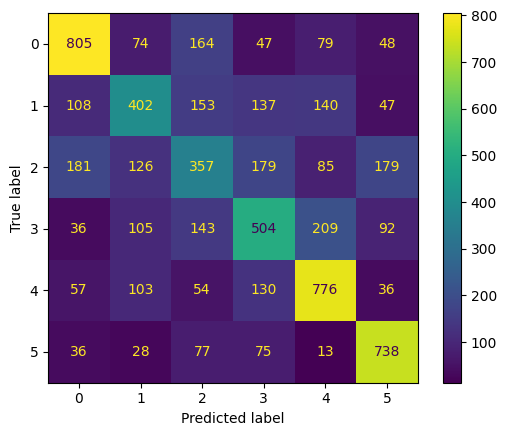

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# plot confusion matrix

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=aal_rf.classes_)

disp.plot();

In [71]:
# accuracy for whole algorithm

In [72]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_rf)

0.5491338341254024

In [73]:
# Precision of the individual genre classifications

In [74]:
# reference: https://www.geeksforgeeks.org/machine-learning-model-evaluation/?ref=gcse_outind

from sklearn.metrics import precision_score
# Calculate precision for genres
# edm 
precision_genre_0 = precision_score(y_test, y_pred_rf, labels=[0], average='weighted')
print(precision_genre_0)
# latin
precision_genre_1 = precision_score(y_test, y_pred_rf, labels=[1], average='weighted')
print(precision_genre_1)
# pop
precision_genre_2 = precision_score(y_test, y_pred_rf, labels=[2], average='weighted')
print(precision_genre_2)
# r&b
precision_genre_3 = precision_score(y_test, y_pred_rf, labels=[3], average='weighted')
print(precision_genre_3)
# rap
precision_genre_4 = precision_score(y_test, y_pred_rf, labels=[4], average='weighted')
print(precision_genre_4)
# rock
precision_genre_5 = precision_score(y_test, y_pred_rf, labels=[5], average='weighted')
print(precision_genre_5)

0.6582174979558463
0.4797136038186158
0.37658227848101267
0.4701492537313433
0.5960061443932412
0.6473684210526316


In [75]:
# we need to further distinguish the genres latin, pop and r&b 
# genres like rock and edm are more different and more easily distinguishable for the algorithm

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Random Forest and XGBoost Models

    @param model - the trained model
    @param X_train dataframe - the training dataset
    @param n int - the number of features we are interested in plotting
    
    @return a plot with the Top n features
    """
    
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()

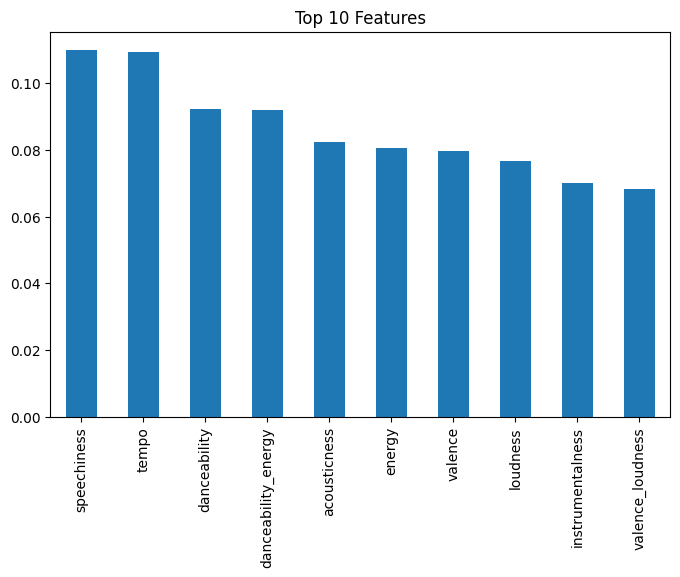

In [77]:
feature_importance_plot(aal_rf, X_train, n = 10)

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score


def learning_curve_plot(model, X_train, y_train, scoring):
    """Plots learning curves for model validation
    
    @param models - list of models we are interested in evaluating
    @param X_train - the training features
    @param y_train - the target
    
    @returns a plot of the learning curve
    """
    
    plt.figure(figsize=(5, 5)) # set figure size
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train,
        # Number of folds in cross-validation
        cv = 5,
        # Evaluation metric
        scoring = scoring,
        # Use all computer cores
        n_jobs = -1,
        shuffle = True,
        # 5 different sizes of the training set
        train_sizes = np.linspace(0.01, 1.0, 5))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color = "#111111", label = "Training score")
    plt.plot(train_sizes, test_mean, color = "#111111", label = "Cross-validation score")

    # Draw bands
    # plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
    # plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

    # Create plot
    plt.title("Learning Curves")
    plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc = "best")
    plt.tight_layout()
    

    plt.show()

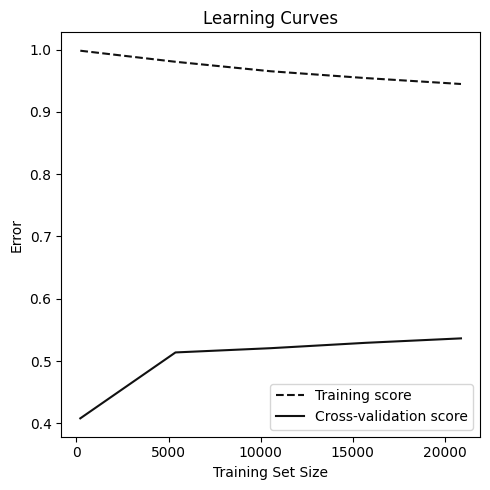

In [79]:
learning_curve_plot(aal_rf, X_train, y_train, scoring = 'accuracy')

# 4. Evaluation